In [8]:
ls datasets

ColeccaoDouradaHAREM.txt       microdados_enem_2016_coma.csv*
enade-2016/                    name_company_corpus.pickle*
example_text.txt               reviews.json
matriculas.csv


In [12]:
ls datasets/enade-2016

enade_var_dict.xlsx*       microdados_enade_2016.txt*


In [17]:
import os

In [18]:
os.path.join('datasets', 'enade-2016', 'microdados_enade_2016.txt')

'datasets/enade-2016/microdados_enade_2016.txt'

In [16]:
a = open(os.path.join('datasets', 'enade-2016', 'microdados_enade_2016.txt'), 'r').read()

In [19]:
print(a[:100])

NU_ANO;CO_GRUPO;CO_IES;CO_CATAD;CO_ORGAC;CO_MUNIC_CURSO;CO_UF_CURSO;CO_REGIAO_CURSO;CO_CURSO;CO_MODA


In [31]:
import pandas as pd

df = pd.read_csv(os.path.join('datasets', 'enade-2016', 'microdados_enade_2016.txt'), 
                sep=';', header=0)

In [32]:
df.head()

,NU_ANO,CO_GRUPO,CO_IES,CO_CATAD,CO_ORGAC,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,CO_CURSO,CO_MODALIDADE,...,qe_i59,qe_i60,qe_i61,qe_i62,qe_i63,qe_i64,qe_i65,qe_i66,qe_i67,qe_i68
0,2016,38,1,10002,10028,5103403,51,5,7,1,...,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,4.0,6.0
1,2016,38,1,10002,10028,5103403,51,5,7,1,...,3.0,3.0,3.0,3.0,3.0,2.0,2.0,5.0,5.0,5.0
2,2016,38,1,10002,10028,5103403,51,5,7,1,...,4.0,1.0,5.0,7.0,7.0,5.0,4.0,7.0,5.0,5.0
3,2016,38,1,10002,10028,5103403,51,5,7,1,...,1.0,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
4,2016,38,1,10002,10028,5103403,51,5,7,1,...,6.0,1.0,4.0,8.0,8.0,3.0,8.0,6.0,3.0,1.0


In [61]:
[c for c in df.columns]

['NU_ANO',
 'CO_GRUPO',
 'CO_IES',
 'CO_CATAD',
 'CO_ORGAC',
 'CO_MUNIC_CURSO',
 'CO_UF_CURSO',
 'CO_REGIAO_CURSO',
 'CO_CURSO',
 'CO_MODALIDADE',
 'NU_IDADE',
 'TP_SEXO',
 'ANO_FIM_2G',
 'ANO_IN_GRAD',
 'TP_SEMESTRE',
 'IN_MATUTINO',
 'IN_VESPERTINO',
 'IN_NOTURNO',
 'ID_STATUS',
 'AMOSTRA',
 'TP_INSCRICAO',
 'NU_ITEM_OFG',
 'NU_ITEM_OFG_Z',
 'NU_ITEM_OFG_X',
 'NU_ITEM_OFG_N',
 'VT_GAB_OFG_ORIG',
 'VT_GAB_OFG_FIN',
 'NU_ITEM_OCE',
 'NU_ITEM_OCE_Z',
 'NU_ITEM_OCE_X',
 'NU_ITEM_OCE_N',
 'VT_GAB_OCE_ORIG',
 'VT_GAB_OCE_FIN',
 'TP_PRES',
 'TP_PR_GER',
 'TP_PR_OB_FG',
 'TP_PR_DI_FG',
 'TP_PR_OB_CE',
 'TP_PR_DI_CE',
 'TP_SFG_D1',
 'TP_SFG_D2',
 'TP_SCE_D1',
 'TP_SCE_D2',
 'TP_SCE_D3',
 'VT_ESC_OFG',
 'VT_ACE_OFG',
 'VT_ESC_OCE',
 'VT_ACE_OCE',
 'NT_OBJ_FG',
 'NT_DIS_FG',
 'NT_FG_D1_PT',
 'NT_FG_D1_CT',
 'NT_FG_D1',
 'NT_FG_D2_PT',
 'NT_FG_D2_CT',
 'NT_FG_D2',
 'NT_FG',
 'NT_OBJ_CE',
 'NT_CE_D1',
 'NT_CE_D2',
 'NT_CE_D3',
 'NT_DIS_CE',
 'NT_CE',
 'NT_GER',
 'qp_i1',
 'qp_i2',
 'qp_i3',
 'qp_

In [33]:
df_filtered_1 = df[df['TP_PRES']==555]

In [34]:
df.shape

(216044, 141)

In [35]:
df_filtered_1.shape

(195757, 141)

In [45]:
type(df_filtered_1['NT_GER'])

pandas.core.series.Series

In [39]:
import pandas_profiling

pandas_profiling.ProfileReport(df_filtered_1[['NT_GER']])

Number of variables,2
Number of observations,195757
Total Missing (%),0.0%
Total size in memory,3.0 MiB
Average record size in memory,16.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [50]:
nt_std = df_filtered_1['NT_GER'].std()
nt_mean = df_filtered_1['NT_GER'].mean()
print('Nota media', nt_mean, 'Desvio', nt_std)

Nota media 47.155028938939516 Desvio 15.049961823019936


In [52]:
def is_good_student(grade):
    if grade > nt_mean + nt_std:
        return 1
    else:
        return 0

In [77]:
lista_colunas = ['CO_IES', 'CO_GRUPO',  
                               'CO_MODALIDADE', 
                               'TP_SEXO',
                               'IN_MATUTINO',
                               'IN_VESPERTINO',
                               'IN_NOTURNO', 
                               'NT_GER']
question_colunas = ['qe_i' + str(i + 1) for i in range(26)]

In [78]:
full_colunas = lista_colunas + question_colunas

In [79]:
df_filtered_2 = df_filtered_1[full_colunas]

In [80]:
df.shape

(216044, 141)

In [81]:
df_filtered_2.shape

(195757, 34)

In [82]:
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195757 entries, 0 to 216043
Data columns (total 34 columns):
CO_IES           195757 non-null int64
CO_GRUPO         195757 non-null int64
CO_MODALIDADE    195757 non-null int64
TP_SEXO          195757 non-null object
IN_MATUTINO      195757 non-null int64
IN_VESPERTINO    195757 non-null int64
IN_NOTURNO       195757 non-null int64
NT_GER           195757 non-null float64
qe_i1            195463 non-null object
qe_i2            195463 non-null object
qe_i3            195463 non-null object
qe_i4            195463 non-null object
qe_i5            195463 non-null object
qe_i6            195463 non-null object
qe_i7            195463 non-null object
qe_i8            195463 non-null object
qe_i9            195463 non-null object
qe_i10           195463 non-null object
qe_i11           195463 non-null object
qe_i12           195463 non-null object
qe_i13           195459 non-null object
qe_i14           195459 non-null object
qe_i15        

In [71]:
import pandas_profiling

pandas_profiling.ProfileReport(df_filtered_2)

Number of variables,36
Number of observations,195757
Total Missing (%),0.1%
Total size in memory,53.8 MiB
Average record size in memory,288.0 B
Numeric,5
Categorical,27
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [83]:
df_filtered_2 = df_filtered_2.fillna('M')

In [73]:
import pandas_profiling

pandas_profiling.ProfileReport(df_filtered_2)

Number of variables,36
Number of observations,195757
Total Missing (%),0.0%
Total size in memory,53.8 MiB
Average record size in memory,288.0 B
Numeric,5
Categorical,27
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [98]:
df_filtered_3 = pd.get_dummies(df_filtered_2, 
                               columns=[c for c in df_filtered_2.columns if c not in ['CO_GRUPO', 
                                                                             'CO_IES',
                                                                             'IN_MATUTINO',
                                                                             'IN_NOTURNO',
                                                                             'IN_VESPERTINO',
                                                                             'NT_GER']])

In [99]:
df_filtered_3.head()

,CO_IES,CO_GRUPO,IN_MATUTINO,IN_VESPERTINO,IN_NOTURNO,NT_GER,CO_MODALIDADE_0,CO_MODALIDADE_1,TP_SEXO_F,TP_SEXO_M,...,qe_i26_A,qe_i26_B,qe_i26_C,qe_i26_D,qe_i26_E,qe_i26_F,qe_i26_G,qe_i26_H,qe_i26_I,qe_i26_M
0,1,38,1,1,1,67.2,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,38,1,1,1,42.4,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,38,1,1,1,83.6,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,38,1,1,1,51.1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,38,1,1,1,70.1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [100]:
grouped_df = df_filtered_3.groupby(['CO_IES', 'CO_GRUPO'])

In [101]:
import numpy as np

course_based_df = grouped_df.agg(np.mean)

In [95]:
type(course_based_df)

pandas.core.frame.DataFrame

In [102]:
course_based_df.shape

(3582, 219)

In [103]:
course_based_df.columns

Index(['IN_MATUTINO', 'IN_VESPERTINO', 'IN_NOTURNO', 'NT_GER',
       'CO_MODALIDADE_0', 'CO_MODALIDADE_1', 'TP_SEXO_F', 'TP_SEXO_M',
       'TP_SEXO_N', 'qe_i1_A',
       ...
       'qe_i26_A', 'qe_i26_B', 'qe_i26_C', 'qe_i26_D', 'qe_i26_E', 'qe_i26_F',
       'qe_i26_G', 'qe_i26_H', 'qe_i26_I', 'qe_i26_M'],
      dtype='object', length=219)

In [106]:
import pandas_profiling

pandas_profiling.ProfileReport(course_based_df[['NT_GER']])

Number of variables,3
Number of observations,3582
Total Missing (%),0.0%
Total size in memory,84.0 KiB
Average record size in memory,24.0 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [108]:
nt_mean = course_based_df['NT_GER'].mean()
nt_std = course_based_df['NT_GER'].std()

In [109]:
print('media', nt_mean, 'std', nt_std)

media 46.85168466601455 std 9.019097673085406


In [ ]:
nt_me

In [110]:
def is_good_school(grade):
    if grade > nt_mean + nt_std:
        return 1
    else:
        return 0

In [111]:
course_based_df['TARGET'] = course_based_df['NT_GER'].apply(lambda x: is_good_school(x))

In [127]:
X_df = course_based_df[[c for c in course_based_df if c not in ['TARGET', 'NT_GER']]]
Y_df = course_based_df['TARGET']

print('Shape Xdf', X_df.shape, 'Shape Ydf', Y_df.shape)

Shape Xdf (3582, 218) Shape Ydf (3582,)


In [128]:
X = X_df.values
Y = Y_df.values

In [129]:
np.shape(X)

(3582, 218)

In [130]:
np.shape(Y)

(3582,)

In [120]:
Y

array([0, 1, 1, ..., 0, 0, 0])

In [132]:
from sklearn.model_selection import train_test_split

random_seed = 42

X_train_initial, X_test, Y_train_initial, Y_test = train_test_split(X, Y, 
                                                                    test_size=0.30, 
                                                                    stratify=Y,
                                                                    shuffle=True,
                                                                    random_state=random_seed)

print('SHAPE X_train_test', np.shape(X_train_initial))
print('SHAPE X_test', np.shape(X_test))
print('SET Y_train', set(Y_train_initial))
print('SET Y_test', set(Y_test))

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_initial, Y_train_initial, 
                                                                test_size=0.2, 
                                                                stratify=Y_train_initial,
                                                                shuffle=True,
                                                                random_state=random_seed)

print('SHAPE train', np.shape(X_train))
print('SHAPE validation', np.shape(X_validation))
print('SHAPE test', np.shape(X_test))

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)

SHAPE X_train_test (2507, 218)
SHAPE X_test (1075, 218)
SET Y_train {0, 1}
SET Y_test {0, 1}
SHAPE train (2005, 218)
SHAPE validation (502, 218)
SHAPE test (1075, 218)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
cm = confusion_matrix(Y_test, prediction)
print('Matriz de confusao', cm)

Matriz de confusao [[853  37]
 [ 82 103]]


In [138]:
Y_score = model.predict_proba(X_test)

In [141]:
from sklearn.metrics import roc_curve, auc

class_to_look = 1
y_score_class = [x[class_to_look] for x in Y_score]

fpr, tpr, thresholds = roc_curve([int(y == class_to_look) for y in Y_test], y_score_class)

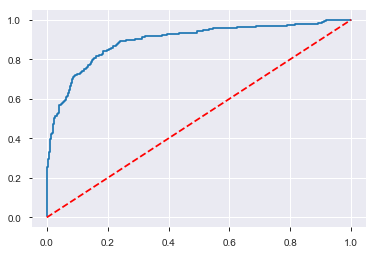

In [142]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.plot(np.linspace(0.0, 1.0, 10), np.linspace(0.0, 1.0, 10), '--r')
plt.show(block=False)

In [134]:
853./(853.0 + 37.0)

0.9584269662921349

In [135]:
853./(853. + 82.0)

0.9122994652406418

In [136]:
103.0/(103. + 82.0)

0.5567567567567567

In [137]:
103.0/(103.0 + 37.0)

0.7357142857142858